In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv("data-files/titanic-train.csv")

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Sex, Pclass, Age, Fare, Embarked, 동행여부 등에 대한 생존여부 시각 화
# 선택사항 : Fare, Age, 동행여부 -> 범주형으로 변경해서 시도

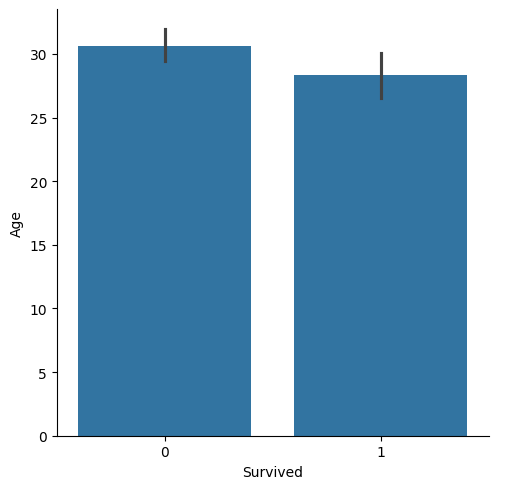

In [5]:
# sns.catplot(x='Age', y='Survived', kind='bar', data=df_titanic)
sns.catplot(x='Survived', y='Age', kind='bar', data=df_titanic)
plt.show()

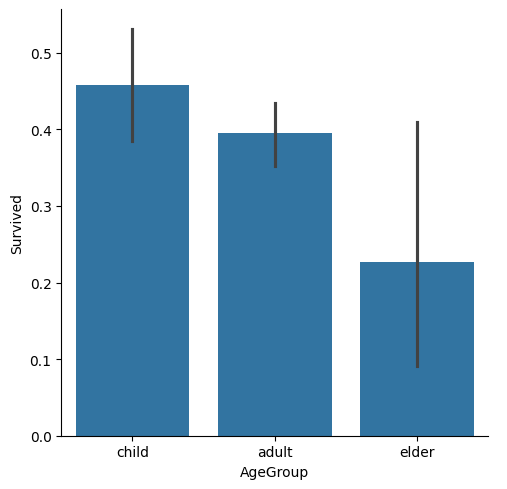

In [8]:
# 데이터를 bins에 지정된 범위로 나누고 각 범위에 labels에 지정된 값을 적용
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0,20,60,200], labels=['child', 'adult', 'elder'])
df_titanic.head()

sns.catplot(x="AgeGroup", y="Survived", kind='bar', data=df_titanic)
plt.show()

In [ ]:
# FutureWarning을 적용하지 마세요
import warnings
warnings.simplefilter(action='ignore', category="FutureWarning")

In [9]:
# aggregate : 데이터에 지정된 함수를 적용해서 결과 반환
df_titanic['Fare'].aggregate(('min', 'max', 'mean', 'median'))

min         0.000000
max       512.329200
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

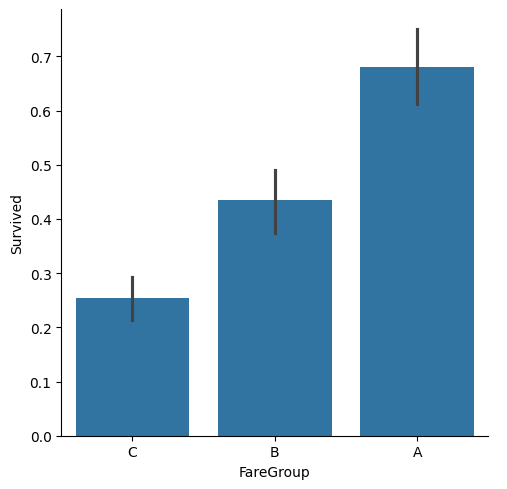

In [14]:
df_titanic['FareGroup'] = pd.cut(df_titanic['Fare'], bins=[0, 15, 50, 1000], labels=['C', 'B', 'A'])
sns.catplot(x='FareGroup', y='Survived', kind='bar', data=df_titanic)
plt.show()

In [11]:
df_titanic['FamilySize'] = df_titanic['Parch'] + df_titanic['SibSp']
df_titanic['IsAlone'] = df_titanic['FamilySize'] == 0
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


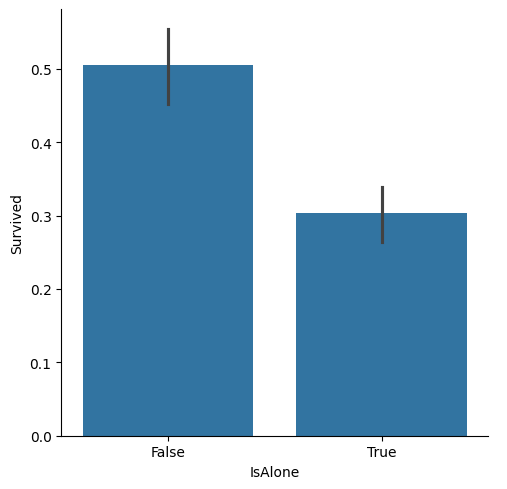

In [13]:
# sns.catplot(x="FamilySize", y="Survived", kind='bar', data=df_titanic)
sns.catplot(x="IsAlone", y="Survived", kind='bar', data=df_titanic)
plt.show()